In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [79]:
import random
import glob
import os  # You need to ensure 'os' is imported for directory checks

# Load all images from the dataset (Mango folder) using glob
data_df = [
    f for f in glob.glob('/content/drive/MyDrive/leaf1/Mango (P0)' + "/**/*", recursive=True)
    if not os.path.isdir(f)
]

# Check the number of files loaded
print(f"Total files loaded: {len(data_df)}")

Total files loaded: 437


In [80]:
import numpy as np #this module is for array operations
import cv2 #use for image processing and computer vision
import os
from PIL import Image, ImageEnhance, ImageFilter, ImageOps #for image processing
import warnings
import random
warnings.filterwarnings('ignore') #for removing the all warnings
import tensorflow as tf #for machine learning
import matplotlib.pyplot as plt #it is for data visualizations
import glob #for loading the data
from skimage.feature import hog

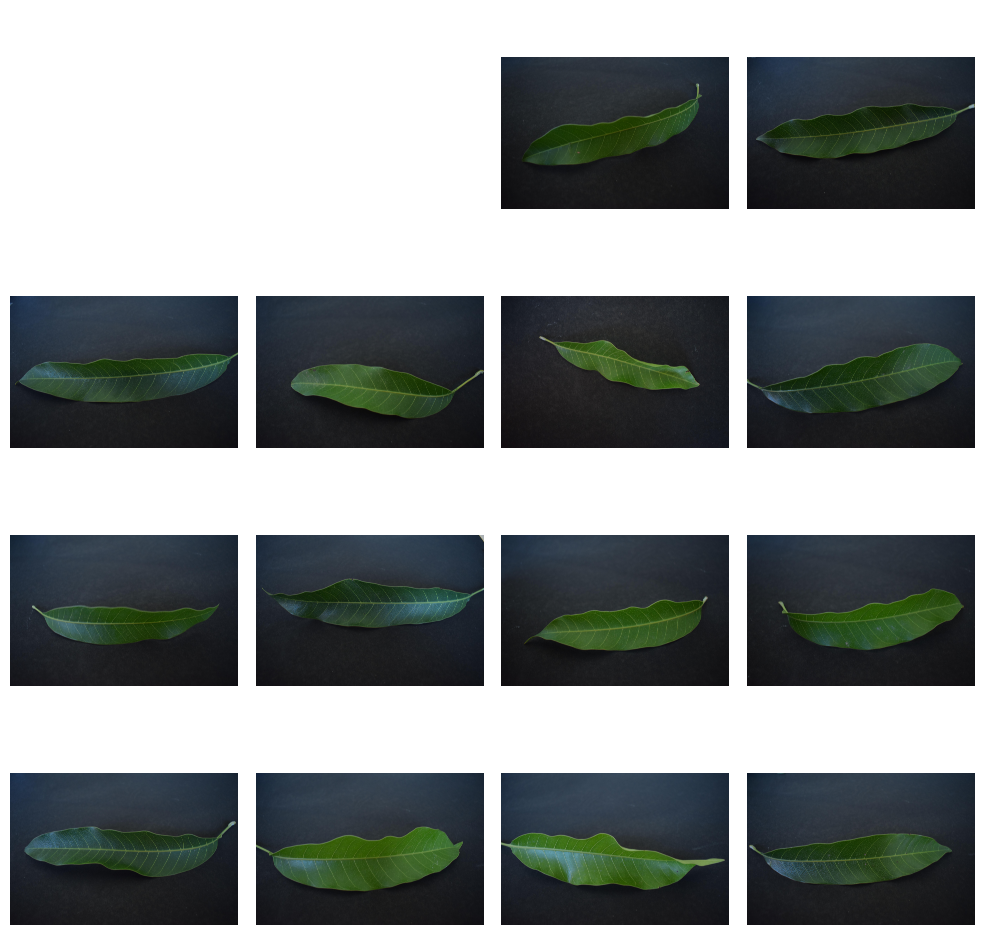

In [81]:
plt.figure(figsize=(10,10))  # Create a figure of size 10x10 inches

# Loop to display the first 16 images from data_df
for i in range(min(16, len(data_df))):  # Ensuring there are at least 16 images
    plt.subplot(4, 4, i + 1)  # Create a 4x4 grid of subplots
    img = cv2.imread(data_df[i])  # Read the image

    if img is not None:  # Check if the image was successfully loaded
        img_r = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
        plt.imshow(img_r)  # Display the image
    else:
        print(f"Warning: Could not load image at {data_df[i]}")  # Print warning for missing/invalid images

    plt.axis("off")  # Turn off axis labels

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()  # Display the figure

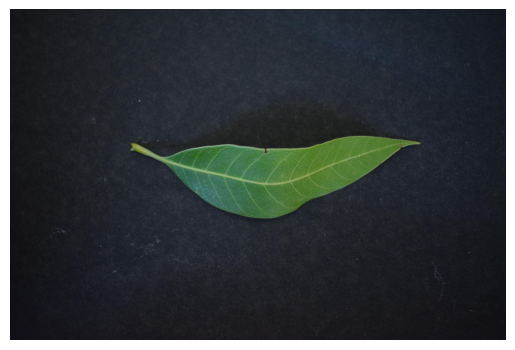

In [82]:
# Load a sample image from the dataset
img = cv2.imread(data_df[100])

# Check if the image was successfully loaded
if img is not None:
    # Convert the image from BGR to RGB for correct color display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Turn off the axis
    plt.show()  # Show the image
else:
    print("Error: Could not load image at data_df[100]")

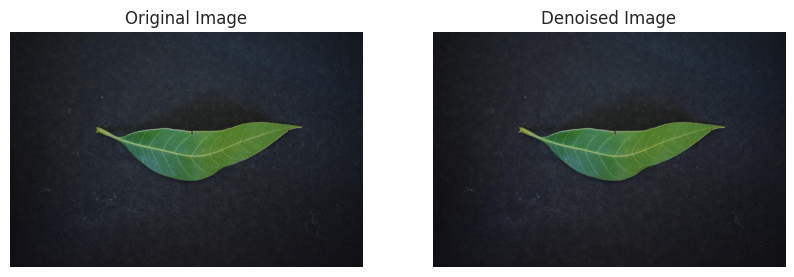

In [83]:
# Import necessary modules
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the image from the dataset
img = cv2.imread(data_df[100])

# Check if the image was successfully loaded
if img is not None:
    # Apply fast Non-Local Means Denoising (for colored images)
    dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)

    # Convert images from BGR to RGB for correct display in matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    # Display original and denoised images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(img_rgb)
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(122), plt.imshow(dst_rgb)
    plt.axis('off')
    plt.title('Denoised Image')

    plt.show()
else:
    print("Error: Could not load image at data_df[100]")

In [84]:
name = []
for i in range(len(data_df)):
    name.append(data_df[i].split(os.path.sep)[-2])

In [85]:
name = set(name)

In [86]:
name

{'Mango (P0)', 'diseased', 'healthy'}

In [ ]:
# Loading, resizing, and labeling images
import os
import cv2
from tqdm import tqdm

data = []
labels = []

for i in tqdm(range(len(data_df))):
    img = cv2.imread(data_df[i])  # Read image

    # Check if the image is loaded properly and is a color image
    if img is not None and img.shape[-1] == 3:  # Ensure it's a 3-channel image (RGB/BGR)
        img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)  # Denoise image
        img = cv2.resize(img, (90, 90))  # Resize image
        data.append(img)

        # Extract label from the folder name
        lbls = data_df[i].split(os.path.sep)[-2]  # Assuming path is something like "path/to/plant_category/image.jpg"

        # Assign numerical labels based on the plant health status
        plant_dict = {
            'diseased': 0,
            'healthy': 1,
        }

        lbl = plant_dict.get(lbls, -1)  # Default to -1 if the label is not found
        labels.append(lbl)
    else:
        print(f"Skipping file {data_df[i]}: Image not loaded correctly or is not a color image.")

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train_resized)

  1%|          | 3/437 [00:00<00:29, 14.96it/s]

Skipping file /content/drive/MyDrive/leaf1/Mango (P0)/sample.txt: Image not loaded correctly or is not a color image.
Skipping file /content/drive/MyDrive/leaf1/Mango (P0)/customer_data.csv: Image not loaded correctly or is not a color image.


100%|██████████| 437/437 [01:31<00:00,  4.76it/s]


In [88]:
#lables and name stored in array
leaf_images = np.array(data)
labels =  np.array(labels).reshape(len(labels),)

In [89]:
# split dataset for training and validation
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(leaf_images, labels, test_size=0.2, random_state=42)

In [90]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(348, 90, 90, 3) (348,)
(87, 90, 90, 3) (87,)


In [91]:
# model imports
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# metrics import
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [92]:
# Reshape the data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # (240, 90*90*3)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)  # (60, 90*90*3)

In [93]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Prepare data for MobileNet input (224x224 is the input size for MobileNet)
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])

# Normalize pixel values for MobileNet
X_train_resized = X_train_resized / 255.0
X_test_resized = X_test_resized / 255.0

# Build MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base MobileNet layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification (diseased or healthy)
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
%time model.fit(X_train_resized, Y_train, epochs=10, validation_data=(X_test_resized, Y_test))


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5953 - loss: 0.7287 - val_accuracy: 0.5632 - val_loss: 0.7190
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6380 - loss: 0.6495 - val_accuracy: 0.5747 - val_loss: 0.6861
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6856 - loss: 0.5722 - val_accuracy: 0.6092 - val_loss: 0.6096
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8048 - loss: 0.4891 - val_accuracy: 0.6437 - val_loss: 0.5818
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7657 - loss: 0.4789 - val_accuracy: 0.6667 - val_loss: 0.5401
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8227 - loss: 0.4474 - val_accuracy: 0.6897 - val_loss: 0.5102
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.7998 - loss: 0.4304 - val_accuracy: 0.7356 - val_loss: 0.4931
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8028 - loss: 0.4347 - val_accuracy: 0.7701 - val_loss:

In [94]:
# basic imports
import numpy as np
import pandas as pd
import os

# plotting imports
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set()

In [95]:
# this function takes any model and evaluates it against both training set and dataset
# it prints the following:
#  1. Accuracy Score against trainning set
#  2. Classification report against training set
#  3. Accuracy Score against test set
#  4. Classification report against test set
#  5. Confusion matrix against test set
def evaluate_model(name, model):
    # predict using the trained model against training dataset
    y_predict_train = model.predict(X_train_flattened_scaled)

    # predict using the trained model against test dataset
    y_predict_test = model.predict(X_test_flattened_scaled)

    print("Evaluating Model: " + name)
    print("")

    print("1. Accuracy Score (training set) for " + name)
    print(accuracy_score(Y_train, y_predict_train))
    print("")

    print("2. Classification Report (training set) for " + name)
    print(classification_report(Y_train, y_predict_train))
    print("")

    print("3. Accuracy Score (test set) for " + name)
    print(accuracy_score(Y_test, y_predict_test))
    print("")

    print("4. Classification Report (test set) for " + name)
    print(classification_report(Y_test, y_predict_test))
    print("")

    print("5. Confusion Matrix for model: " + name)
    cmap = sns.cubehelix_palette(light= 0.9, as_cmap=True)
    cm = confusion_matrix(Y_test, y_predict_test)
    sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
               xticklabels=['diseased', 'Healthy'],
               yticklabels=['diseased', 'Healthy'], cmap=cmap)

    plt.xlabel('True label', size=12)
    plt.ylabel('Predicted label', size=12)
    plt.title('Confusion matrix for model: ' + name)

In [96]:
def evaluate_model(name, model):
    # Predict using the trained model on training and test datasets
    y_predict_train = (model.predict(X_train_resized) > 0.5).astype("int32")
    y_predict_test = (model.predict(X_test_resized) > 0.5).astype("int32")

    print("Evaluating Model: " + name)
    print("")

    print("1. Accuracy Score (training set) for " + name)
    print(accuracy_score(Y_train, y_predict_train))
    print("")

    print("2. Classification Report (training set) for " + name)
    print(classification_report(Y_train, y_predict_train))
    print("")

    print("3. Accuracy Score (test set) for " + name)
    print(accuracy_score(Y_test, y_predict_test))
    print("")

    print("4. Classification Report (test set) for " + name)
    print(classification_report(Y_test, y_predict_test))
    print("")

    print("5. Confusion Matrix for model: " + name)
    cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
    cm = confusion_matrix(Y_test, y_predict_test)
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
               xticklabels=['diseased', 'healthy'],
               yticklabels=['diseased', 'healthy'], cmap=cmap)

    plt.xlabel('True label', size=12)
    plt.ylabel('Predicted label', size=12)
    plt.title('Confusion matrix for model: ' + name)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5661 - loss: 0.7523 - val_accuracy: 0.5747 - val_loss: 0.6847
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6111 - loss: 0.6767 - val_accuracy: 0.6667 - val_loss: 0.6095
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.7008 - loss: 0.5640 - val_accuracy: 0.7356 - val_loss: 0.5535
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7340 - loss: 0.5127 - val_accuracy: 0.7586 - val_loss: 0.5195
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7768 - loss: 0.5109 - val_accuracy: 0.7586 - val_loss: 0.4934
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7970 - loss: 0.4474 - val_accuracy: 0.7931 - val_loss: 0.4718
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8181 - loss: 0.3952 - val_accuracy: 0.8276 - val_loss: 0.4417
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8647 - loss: 0.3500 - val_accuracy: 0.8276 - val_loss:

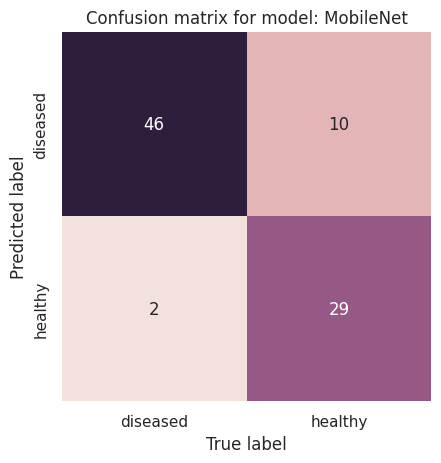

In [97]:
# Define and train the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base MobileNet layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification (diseased or healthy)
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_resized, Y_train, epochs=10, validation_data=(X_test_resized, Y_test))

# Evaluate the MobileNet model
evaluate_model('MobileNet', model)
